### Read csv file and create data frame

In [69]:
cd ../pnp_hard

/cvhci/temp/prgc/mvitv2/visualize_pnp/pnp_hard


In [51]:
cd noisy_20

/cvhci/temp/prgc/mvitv2/visualize_noise/noisy_20


In [80]:
cd ~

/home/prgc


In [81]:
cd ../../cvhci/temp/prgc/mvitv2/visualize_elr

/cvhci/temp/prgc/mvitv2/visualize_elr


In [82]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.manifold import TSNE 
 
df = pd.read_csv("./embeddings.csv", names=range(769)) 
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,768
0,0.703770,-0.091889,-0.158877,1.420278,0.445205,1.532195,-0.204421,-0.724593,-0.145500,-0.575617,...,1.437564,-0.883588,1.401002,-0.176174,0.725779,0.294547,0.389774,0.499509,3.016065,15.0
1,0.053258,-1.778714,-1.758600,-0.123120,-2.015308,0.962913,0.909386,0.416766,2.075158,-0.989506,...,0.414162,1.479905,0.883537,-1.174991,-2.350809,1.298652,-0.700883,0.185409,-1.031378,12.0
2,0.383776,-0.151814,-0.406244,-0.268028,-0.386709,-1.397656,-1.326303,-2.533455,-1.623903,-0.149590,...,0.403659,-1.064344,-0.475877,-1.023757,-0.995799,-0.088038,0.825611,-1.782820,0.088759,34.0


In [83]:
emb_df = df.iloc[:, :768]
emb_df.head(3)

labels_df = df.iloc[:, -1]
labels_df.head(3)

0    15.0
1    12.0
2    34.0
Name: 768, dtype: float64

### Plot 2D t-SNE

In [84]:
tsne = TSNE(n_components=2).fit_transform(emb_df)

In [85]:
data = np.vstack((tsne.T, labels_df)).T 
print(data.shape)
df_tsne = pd.DataFrame(data, columns=['dim1', 'dim2', 'label']) 
df_tsne.head()

(3886, 3)


,dim1,dim2,label
0,-18.733768,-26.152607,15.0
1,17.504879,56.326660,12.0
2,-9.164824,-11.989749,34.0
3,20.435377,8.684886,1.0
4,0.087123,63.892193,54.0


In [86]:
data = np.vstack((tsne_2.T, labels_df)).T 
print(data.shape)
df_tsne = pd.DataFrame(data, columns=['dim1', 'dim2', 'label']) 
df_tsne.head()

(3886, 3)


,dim1,dim2,label
0,-0.251313,-55.595085,15.0
1,-4.095501,56.806545,12.0
2,11.628373,-13.693762,34.0
3,-6.440727,12.891215,1.0
4,18.047098,55.596153,54.0


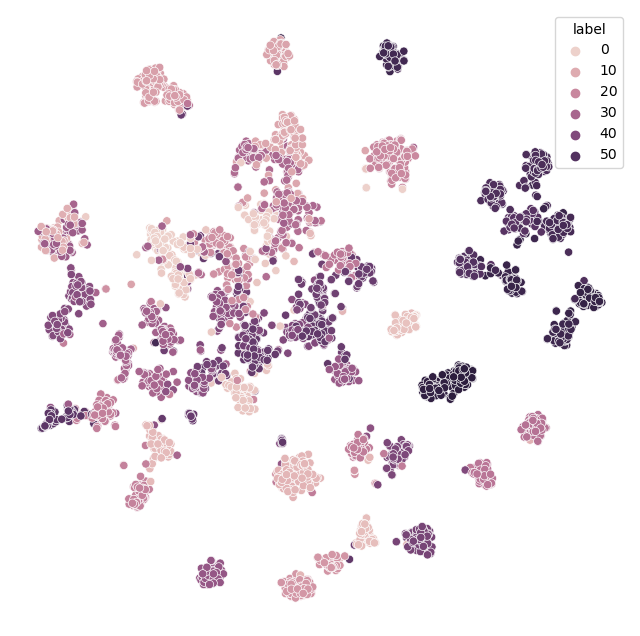

In [87]:
plt.figure(figsize=(8, 8)) 
sns.scatterplot(data=df_tsne, hue='label', x='dim1', y='dim2') 
plt.axis('off')
plt.show()

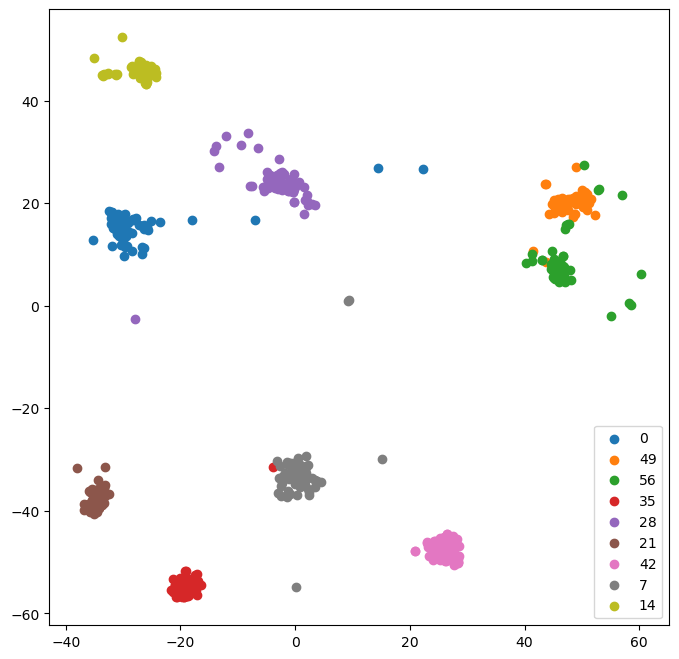

In [88]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

x = df_tsne['dim1']
y = df_tsne['dim2']
# z = df_tsne_3d['dim3']
i = df_tsne['label']

for s in i.unique():
    if s % 7 == 0:
        ax.scatter(x[i==s],y[i==s],label=int(s))
ax.legend()
# plt.axis('off')

### Plot 3D t-SNE

In [89]:
tsne_3d = TSNE(n_components=3).fit_transform(emb_df)

In [90]:
data_3d = np.vstack((tsne_3d.T, labels_df)).T 
print(data_3d.shape)
df_tsne_3d = pd.DataFrame(data_3d, columns=['dim1', 'dim2', 'dim3', 'label']) 
df_tsne_3d.head()

(3886, 4)


,dim1,dim2,dim3,label
0,-6.477710,-4.684879,15.812602,15.0
1,6.009941,18.126419,2.236152,12.0
2,-6.388047,-4.234280,-9.217259,34.0
3,7.241894,1.761072,0.554268,1.0
4,2.206443,18.153011,-6.371053,54.0


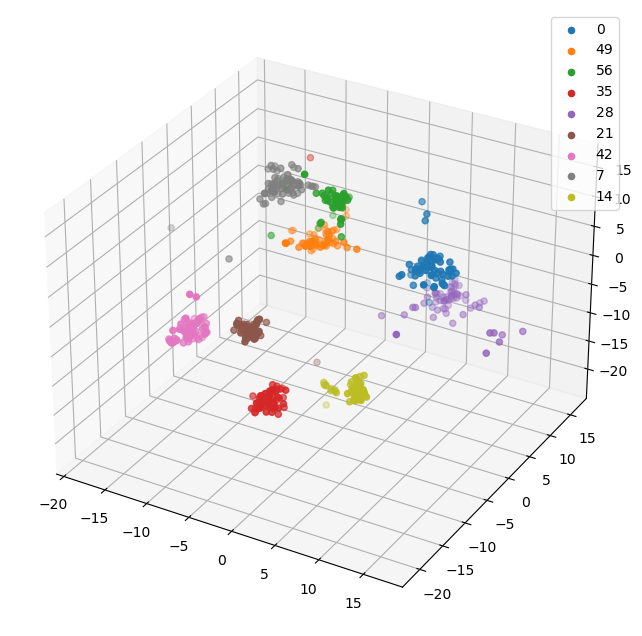

In [91]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

x = df_tsne_3d['dim1']
y = df_tsne_3d['dim2']
z = df_tsne_3d['dim3']
i = df_tsne_3d['label']

for s in i.unique():
    if s % 7 == 0:
        ax.scatter(x[i==s],y[i==s],z[i==s],label=int(s))
ax.legend()